## Proposition 2.5 - Implementation

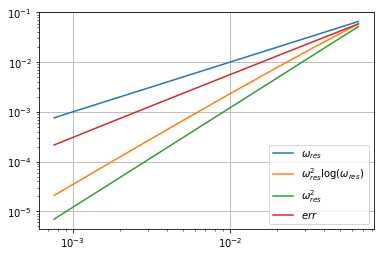

omega_res_exact:
0.124994742562
 0.062508472140
 0.031249804694
 0.015624149374
 0.007812697649
 0.003906223275
 0.001953199399
 0.000976562767

omega_res:
0.065998644729
 0.035339397444
 0.018858359550
 0.010017336959
 0.005294986689
 0.002785083880
 0.001458605693
 0.000760872337



In [42]:
from math import log
from math import sqrt
from mpmath import pi
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.special import jv
from scipy.optimize import brentq
from sympy import sympify
from sympy.core import S

# Variables
delta = 1
eps_m = 1
eps_c = 1
tau = [38.4, 133.1, 464.5, 1636, 5819, 20902, 75731, 276574];
mu_01 = 2.404825557695773
lambda_01 = 5.783185962946785
j_nrmlzn_01 = (delta*sqrt(pi*(jv(0,mu_01)**2 + jv(1,mu_01)**2)))**(-1)
euler_gamma = S.EulerGamma.evalf(16)

# Reference solution from mulitpole BIE formulation in MatLab
omega_res_exact = [0.1249947425621660, \
                   0.0625084721400164, \
                   0.0312498046938617, \
                   0.0156241493737074, \
                   0.0078126976492044, \
                   0.0039062232753306, \
                   0.0019531993986338, \
                   0.0009765627668796]

# Rootfinding function
min = 0.00000001
max = 0.2
inc = 0.0001
def omega_res_rootfind(omega_res, tau):
    eg_omega_res = np.array(euler_gamma*omega_res,dtype=np.float64)
    t_1 = 1
    t_2 = omega_res**2*tau*eps_c
    t_3_1 = np.log(eg_omega_res)
    t_3_2 = -2*pi*(j_nrmlzn_01*delta/lambda_01*jv(1,mu_01))**2
    t_4 = lambda_01
    return t_1-t_2*(t_3_1*t_3_2+t_4);

omega_res = []
omega_res_err = []
for ind, t in enumerate(tau):
    omega_res.append(brentq(omega_res_rootfind, min, max, t))
    omega_res_err.append(abs(omega_res_exact[ind]-omega_res[ind]))

# Plot so we can be sure we are root finding in the right place
if 1 == 0:
    x = np.arange(min, max, inc)
    omega_res_rootfind_x = omega_res_rootfind(x, tau[6])
    
    fig, ax = plt.subplots()
    ax.plot(x, omega_res_rootfind_x)
    ax.grid()
    plt.show()
    
def omega_res_lin(omega_res):
    return(omega_res)

def omega_res_quad_log(omega_res):
    return(5*abs(np.power(omega_res,2)*np.log(omega_res)))

def omega_res_quad(omega_res):
    return(12*np.power(omega_res,2))

omega_res_lin_eval = omega_res_lin(omega_res)
omega_res_quad_log_eval = omega_res_quad_log(omega_res)
# print(omega_res_lin_eval)
# print(omega_res_quad_log_eval)
omega_res_quad_eval = omega_res_quad(omega_res)

fig, ax = plt.subplots()
ax.plot(omega_res, omega_res_lin_eval, label='$\omega_{res}$')
ax.plot(omega_res, omega_res_quad_log_eval, label='$\omega_{res}^2\log(\omega_{res})$')
ax.loglog(omega_res, omega_res_quad_eval, label='$\omega_{res}^2$')
ax.loglog(omega_res, omega_res_err, label='$err$')
ax.grid()
ax.legend()
plt.show()    
    
print("omega_res_exact:"); print(*[f"{o:.12f}\n" for o in omega_res_exact])
print("omega_res:"); print(*[f"{o:.12f}\n" for o in omega_res])


test